In [7]:
import autoroot
from typing import Optional, Callable
import toolz 
import functools as ft
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm.auto as tqdm
from rastervision.core.data import RasterioSource, XarraySource
import xarray as xr
import rioxarray

sns.reset_defaults()
sns.set_context(context="talk", font_scale=0.7)

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
example_file = "/Users/anna.jungbluth/Desktop/git/rs_tools/data/terra/analysis/20181001154500_patch_8.nc"

In [9]:
ds = xr.open_dataset(example_file)

In [10]:
ds

<xarray.Dataset>
Dimensions:          (y: 256, x: 256, band: 38, time: 1, band_wavelength: 38)
Coordinates:
    latitude         (y, x) float32 ...
    longitude        (y, x) float32 ...
  * band             (band) object '1' '2' '3' '4' ... '35' '36' '13hi' '14hi'
    cloud_mask       (y, x) float32 ...
  * time             (time) object '2018-10-01 15:45'
  * band_wavelength  (band_wavelength) float64 0.645 0.8585 ... 13.94 14.23
Dimensions without coordinates: y, x
Data variables:
    Rad              (band, y, x) float32 ...

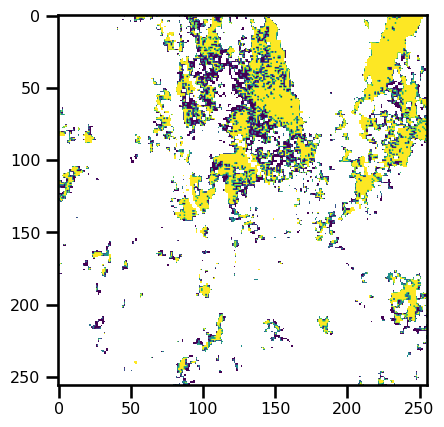

In [11]:
plt.imshow(ds.cloud_mask.values)

In [12]:
ds.sel(band='1').Rad.values.shape

(256, 256)

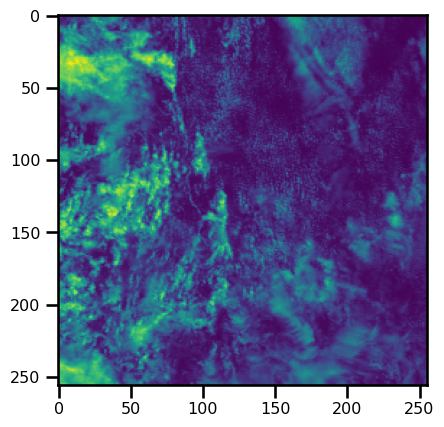

In [26]:
plt.imshow(ds.sel(band='3').Rad.values) # Why does this look so strange?

In [28]:
example_file_np = "/Users/anna.jungbluth/Desktop/git/rs_tools/data/terra/analysis/20181001154500_radiance_patch_8.npy"

In [29]:
np_data = np.load(example_file_np)

In [30]:
np_data.shape

(38, 256, 256)

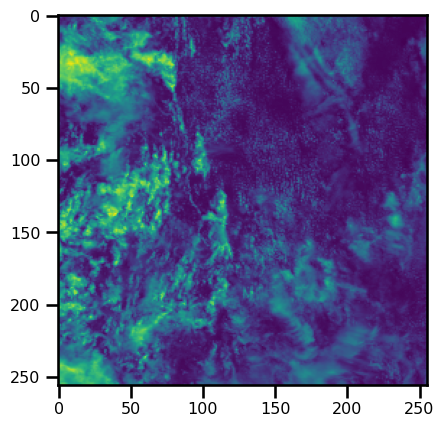

In [31]:
plt.imshow(np_data[3, :, :])